In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 读取CSV文件
df = pd.read_csv("../../go_files/data/merged_comments_2col_v3.csv")
# 将UserComment列中的NaN值替换为空字符串
df['UserComment'].fillna('', inplace=True)

In [3]:
# 统计评分的频率分布
rating_counts = df['UserRating'].value_counts().sort_index()

In [4]:
# 计算评分的平均值、标准差
mean_rating = df['UserRating'].mean()
std_rating = df['UserRating'].std()

In [5]:
# 计算评论长度的平均值、最大值、最小值、标准差
comment_lengths = df['UserComment'].apply(len)
mean_comment_length = comment_lengths.mean()
max_comment_length = comment_lengths.max()
min_comment_length = comment_lengths.min()
std_comment_length = comment_lengths.std()

In [6]:
# 打印统计结果
print("Rating Counts:\n", rating_counts)
print(f"Average Rating: {mean_rating:.2f}")
print(f"Standard Deviation of Rating: {std_rating:.2f}")
print(f"Average Comment Length: {mean_comment_length:.2f}")
print(f"Max Comment Length: {max_comment_length}")
print(f"Min Comment Length: {min_comment_length}")
print(f"Standard Deviation of Comment Length: {std_comment_length:.2f}")

Rating Counts:
 1    14234
2    36498
3    55025
4    37052
5    55095
Name: UserRating, dtype: int64
Average Rating: 3.42
Standard Deviation of Rating: 1.26
Average Comment Length: 56.11
Max Comment Length: 1903
Min Comment Length: 0
Standard Deviation of Comment Length: 62.96


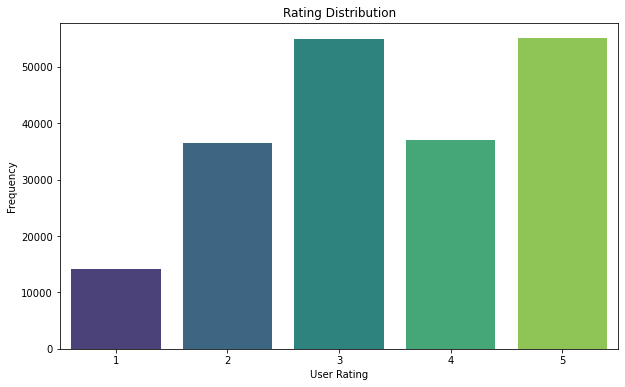

In [7]:
# 可视化评分的频率分布
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

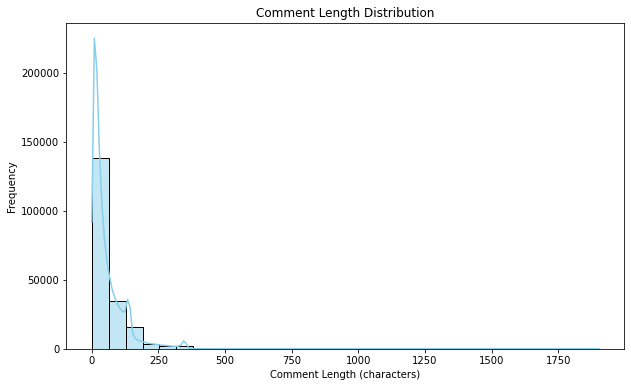

In [8]:
# 可视化评论长度的分布
plt.figure(figsize=(10, 6))
sns.histplot(comment_lengths, bins=30, kde=True, color='skyblue')
plt.title('Comment Length Distribution')
plt.xlabel('Comment Length (characters)')
plt.ylabel('Frequency')
plt.show()

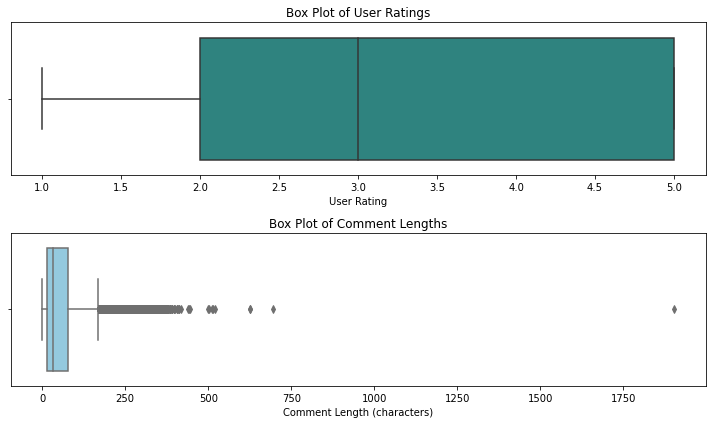

In [9]:
# 可视化评分和评论长度的盒形图
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.boxplot(x=df['UserRating'], palette='viridis')
plt.title('Box Plot of User Ratings')
plt.xlabel('User Rating')

plt.subplot(2, 1, 2)
sns.boxplot(x=comment_lengths, color='skyblue')
plt.title('Box Plot of Comment Lengths')
plt.xlabel('Comment Length (characters)')

plt.tight_layout()
plt.show()

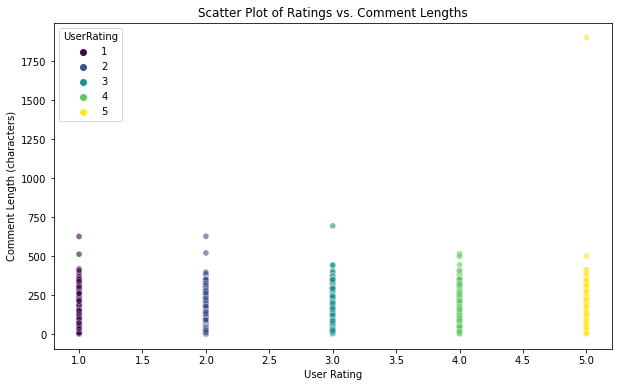

In [10]:
# 可视化评分和评论长度的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['UserRating'], y=comment_lengths, hue=df['UserRating'], palette='viridis', alpha=0.6)
plt.title('Scatter Plot of Ratings vs. Comment Lengths')
plt.xlabel('User Rating')
plt.ylabel('Comment Length (characters)')
plt.show()

In [11]:
from wordcloud import WordCloud

In [12]:
# 合并所有评论为一个字符串
text = ' '.join(df['UserComment'])

In [22]:
# 指定支持表情符号的字体路径
# font_path = 'Noto_Color_Emoji/NotoColorEmoji-Regular.ttf'
font_path = 'C:/Windows/Fonts/simsun.ttc'  # 宋体


In [23]:
# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


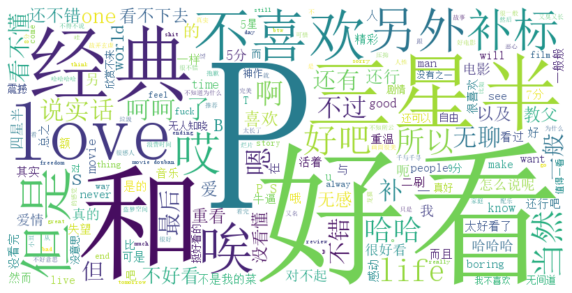

In [25]:
# 显示词云图
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Word Cloud of User Comments')
plt.show()